In [1]:
import pandas as pd
import functions as fn
import pickle

## Load Data into Data Frame and Save it

#### EXECUTED JUST ONCE AT THE BEGINNING

In [2]:
df = fn.create_dataframe()

In [ ]:
df = df.drop_duplicates(subset='url')

This function below saves the dataframe we have created into one csv file, so that we can just import it instead of recreating it every time.

In [5]:
df.to_csv(r'./data.csv', index = False)    

#### READ ONLY THE COLUMNS THAT WE NEED IN THE DATAFRAME CREATED

In [6]:
df = pd.read_csv("./data.csv", usecols= ['bookTitle','plot','url'])    #to read

This time we are only importing the columns that we will need in our analysis to make the process smoother and faster

In [7]:
df

,bookTitle,plot,url
0,The Hunger Games,"Could you survive on your own in the wild, wit...",https://www.goodreads.com/work/best_book/27927...
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,https://www.goodreads.com/work/best_book/28092...
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/work/best_book/32757...
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/work/best_book/30609...
4,Twilight,About three things I was absolutely positive.F...,https://www.goodreads.com/work/best_book/32122...
...,...,...,...
27057,Chicken Soup for the Soul: From Lemons to Lemo...,From lemons to lemonade; from heartbreak to ha...,https://www.goodreads.com/work/best_book/21955...
27058,The Lucy Variations,Lucy Beck-Moreau once had a promising future a...,https://www.goodreads.com/work/best_book/16774...
27059,Look to See Me: A Collection of Reflections,NaN,https://www.goodreads.com/book/show/11457776-l...
27060,The Silver Wolf,Regeane is a fatherless royal relation who hap...,https://www.goodreads.com/work/best_book/25070...


#### Before starting we want to define some useful functions that we will use to save dictionaries into pickle files and load them back every time we might need them

In [8]:
#Useful functions to save and load files in pickle format
def save_dict(obj, name ):
    with open(f'{name}.pickle', 'wb') as f:
        pickle.dump(obj, f)

def load_obj(name ):
    with open(f'{name}.pickle', 'rb') as f:
        return pickle.load(f)

# Q2. Search Engine
## 2.1. Conjunctive query
In this firts version of the search engine we just want to evaluate conjuctive queries (AND) with respect of only the **plot** of the books

### Examine Null Values

In [9]:
df['plot'].isnull().sum()

582

#### substitute nulla values in the plot with a string

In [10]:
df['plot'].fillna('unknown',inplace = True)

In [11]:
df['plot'].isnull().sum()

0

The first thing to do, when building a search engine is creating a **vocabulary**. We will first look at all the unique words into the plot of each book and create a list of them, then, from this list, we will map each word to an integer, that we will call **term_id** and will be useful in the future creation of the **inverted index**.

#### The next two cells were runned just one time at the beginning

In [12]:
dictionary = fn.build_dictionary(df)

In [13]:
save_dict(dictionary,'vocabulary')   #to save

#### Everytime that we restart the kernel we just need to load the file that we have already created, using the command below:

In [14]:
dictionary = load_obj('vocabulary')  #to load

Now, before calculating the inverted index we will determine, for each document, the frequency of each word in the document:

In [15]:
frequency_of_words = fn.frequency_of_words_per_book(df,dictionary)

We now have all the tools needed to create our first **inverted index**: we will run the cell below just one time and store the inverted index in a pickle file so that we can recall it every time we need it.

#### The next two cells were runned just one time at the beginning

In [16]:
inverted_index_1 = fn.inverted_index1(df,dictionary,frequency_of_words)

In [17]:
save_dict(inverted_index_1,'inverted_index_1')    #to save

#### Everytime that we restart the kernel we just need to load the file that we have already created, using the command below:

In [18]:
inverted_index_1 = load_obj('inverted_index_1')   #to load

Let's now give in input a query:

In [19]:
query = input()

survival games


We have to pre-process the query as well if we want to recall it inside our inverted index

In [20]:
query = fn.query_processed(query)
query

['surviv', 'game']

### SEARCH ENGINE 1

Now we have **everything** so we can implement our very first **search engine**

In [21]:
output = fn.search_engine1(query,df,inverted_index_1,dictionary)

In [22]:
output.head(10)

,bookTitle,plot,url
0,The Hunger Games,"Could you survive on your own in the wild, wit...",https://www.goodreads.com/work/best_book/27927...
1,Catching Fire,SPARKS ARE IGNITING.FLAMES ARE SPREADING.AND T...,https://www.goodreads.com/work/best_book/61714...
2,Mockingjay,The final book in the ground-breaking HUNGER G...,https://www.goodreads.com/work/best_book/88127...
3,Legend,What was once the western United States is now...,https://www.goodreads.com/work/best_book/14157...
4,"A Child Called ""It""",Also see: Alternate Cover Editions for this IS...,https://www.goodreads.com/work/best_book/59104...
5,The Magus,"This daring literary thriller, rich with eroti...",https://www.goodreads.com/work/best_book/18164...
6,Ender's Shadow,Welcome to Battleschool.Growing up is never ea...,https://www.goodreads.com/work/best_book/31455...
7,The Lucky One,When U.S. Marine Logan Thibault finds a photog...,https://www.goodreads.com/work/best_book/30944...
8,Sliding on the Snow Stone,It is astonishing that anyone lived this story...,https://www.goodreads.com/work/best_book/18004...
9,Code Name Verity,"Oct. 11th, 1943 - A British spy plane crashes ...",https://www.goodreads.com/work/best_book/16885...


## 2.2 Conjunctive query & Ranking score
### For the second search engine, given a query, we want to get the top-k documents related to the query. In particular:
- Find all the documents that contains all the words in the query.
- Sort them by their similarity with the query
- Return in output k documents, or all the documents with non-zero similarity with the query when the results are less than k. 

In [23]:
df

,bookTitle,plot,url
0,The Hunger Games,"Could you survive on your own in the wild, wit...",https://www.goodreads.com/work/best_book/27927...
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,https://www.goodreads.com/work/best_book/28092...
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/work/best_book/32757...
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/work/best_book/30609...
4,Twilight,About three things I was absolutely positive.F...,https://www.goodreads.com/work/best_book/32122...
...,...,...,...
27057,Chicken Soup for the Soul: From Lemons to Lemo...,From lemons to lemonade; from heartbreak to ha...,https://www.goodreads.com/work/best_book/21955...
27058,The Lucy Variations,Lucy Beck-Moreau once had a promising future a...,https://www.goodreads.com/work/best_book/16774...
27059,Look to See Me: A Collection of Reflections,unknown,https://www.goodreads.com/book/show/11457776-l...
27060,The Silver Wolf,Regeane is a fatherless royal relation who hap...,https://www.goodreads.com/work/best_book/25070...


In [24]:
df.isnull().sum()

bookTitle    0
plot         0
url          0
dtype: int64

To answer this question we first need to define the concepts of **TF-IDF score** and **cosine similarity**.

**TF-IDF** stands for **Term Frequency-Inverse Document Frequency**. This tecnique is used to quantify the words inside a document by giving a weigth to each word in proportion with its importance.

So, this score is given by two main components:
- *Term Frequency*: that measures the frequency of a word in a document. It is given by: $\textrm{tf}(t,d)=\frac{\textrm{count of t in d}}{\textrm{number of words in d}}$


- *Document Frequency*: it measures the importance of the document by counting the number of documents is which a certain word is present (at least one time): 
$\textrm{df}(t) = \textrm{occurrence of t in documents}$

But we actually need the *Inverse Document Frequency*:
it measures the informativeness of the term t in the document. IDF will be small if the occurence of the words is very big and viceversa:
    $\textrm{idf}(t) = \frac{N}{\textrm{df}}$

There may be some problems with $IDF$, in particular in the cases where the corpus is really large, so in this case it may be convenient to take the log of it.
Also, if a word that is not in the pre-determined vocabolary occurs, its df will be equal to $0$, but then we would have a division with 0 at the denominator, which, of course, is going to lead to an error. To solve this issue we are just going to add a 1 to the denominator. So, the final formula is: $\textrm{idf}(t) = \textrm{log}(\frac{N}{\textrm{df}+1})$

Finally, the TD-IDF score is defined by:        

$\textrm{tf}-\textrm{idf}(t,d) = \textrm{tf}(t,d)*\textrm{log}(\frac{N}{\textrm{df}+1})$


## Step 1: calculate TF-IDF score

In [25]:
tf_score = fn.tf(df,dictionary,frequency_of_words)

In [26]:
idf_score = fn.idf(df,dictionary,frequency_of_words)

#### The next two cells were runned just one time at the beginning

In [27]:
tf_idf_scores = fn.tf_idf_score(df,dictionary,tf_score,idf_score)

In [28]:
save_dict(tf_idf_scores,'tf_idf_scores')    #to save

#### Everytime that we restart the kernel we just need to load the file that we have already created, using the command below:

In [29]:
tf_idf_scores = load_obj('tf_idf_scores')   #to load

## Step 2: from list of words calculate inverted index 

#### The next two cells were runned just one time at the beginning

In [30]:
inverted_index_2 = fn.inverted_index2(df,dictionary,tf_idf_scores,frequency_of_words)

In [31]:
save_dict(inverted_index_2,'inverted_index_2')    #to save

#### Everytime that we restart the kernel we just need to load the file that we have already created, using the command below:

In [32]:
inverted_index_2 = load_obj('inverted_index_2')   #to load

## Step 3: calculate cosine similarity

Let's now talk about **cosine similarity**:
this is just a metric used to measure how similar the documents regardless their size. Geometrically speaking this consists of measuring the cosine of the angle between two vectors (where the vector corresponds to a word in the document). The formula to use is the following: $\textrm{cos}(\hat{\theta}) = \textrm{cos}(\vec{x},\vec{y}) = \frac{\vec{x}\cdot\vec{y}}{||\vec{x}||\cdot||\vec{y}||}=\frac{\sum_{i=1}^{m} x_i\cdot y_i}{||\vec{x}||\cdot||\vec{y}||}$



In our specific case the final formula will be the following:
 $\textrm{score} (\vec{q},\vec{d_i}) = \frac{1}{||\vec{q}||}\cdot \frac{1}{||\vec{d_i}||} \cdot \sum_{j=1}^{m} \vec{q_j}\vec{d_j^i}$
 


In [33]:
cosine_similarity_score = fn.cosine_similarity(query,df,tf_idf_scores)

### SEARCH ENGINE 2

We are now read to build our second search engine. First, we need in input a query from the user:

In [34]:
query = input()

survival games


Then, we want to pre-process the query so that it can be found in the inverted index

In [35]:
query = fn.query_processed(query)
query

['surviv', 'game']

<p>&nbsp;</p>

Finally, we can look at the output we want, sorted in decreasing order based on the book's cosine similarity score:

In [36]:
output2 = fn.search_engine2(df,query,inverted_index_1,dictionary,cosine_similarity_score)

In [37]:
output2

,bookTitle,plot,url,Similarity
83,The Warden,Alice has led a normal life up until now. She ...,https://www.goodreads.com/work/best_book/54520...,0.5094
120,Devil's Own,"After surviving slavery, Aiden MacAlpin has no...",https://www.goodreads.com/work/best_book/13578...,0.3973
38,The Quillan Games,LET THE GAMES BEGIN....Quillan is a territory ...,https://www.goodreads.com/work/best_book/73848...,0.3651
0,The Hunger Games,"Could you survive on your own in the wild, wit...",https://www.goodreads.com/work/best_book/27927...,0.3248
4,"A Child Called ""It""",Also see: Alternate Cover Editions for this IS...,https://www.goodreads.com/work/best_book/59104...,0.2848
37,Truth,From New York Times and USA Today bestselling ...,https://www.goodreads.com/work/best_book/21863...,0.2748
58,The Books of the South,Marching south after the ghastly battle at the...,https://www.goodreads.com/work/best_book/23725...,0.2556
50,Cage of Darkness,"While traveling to Fren, Allyssa and Odar are ...",https://www.goodreads.com/work/best_book/43296...,0.2343
102,Blood Awakening,"A dangerous game of life, blood, and survival…...",https://www.goodreads.com/work/best_book/15950...,0.2267
26,The Calling,"Twelve thousand years ago, they came. They des...",https://www.goodreads.com/work/best_book/35441...,0.2256


# Q4: Make a nice visualization

#### Import only the columns of the Dataset useful for this part

In [51]:
df = pd.read_csv("./data.csv", usecols= ['bookTitle','bookSeries','numberOfPages','published','url'])

#### Remove rows of books that don't belong to a series

In [52]:
df = df.drop(df[df['bookSeries'].isnull()].index)

In [53]:
df = df.reset_index()

In [54]:
df

,index,bookTitle,bookSeries,numberOfPages,published,url
0,0,The Hunger Games,The Hunger Games #1,374.0,September 14th 2008,https://www.goodreads.com/work/best_book/27927...
1,1,Harry Potter and the Order of the Phoenix,Harry Potter #5,870.0,June 21st 2003,https://www.goodreads.com/work/best_book/28092...
2,2,To Kill a Mockingbird,To Kill a Mockingbird,324.0,July 11th 1960,https://www.goodreads.com/work/best_book/32757...
3,4,Twilight,The Twilight Saga #1,501.0,October 5th 2005,https://www.goodreads.com/work/best_book/32122...
4,7,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,767.0,1956,https://www.goodreads.com/work/best_book/78127...
...,...,...,...,...,...,...
12544,27049,Clouds of Witness,Lord Peter Wimsey #2,288.0,1926,https://www.goodreads.com/work/best_book/15762...
12545,27052,Because You Are Mine,Because You Are Mine #1,368.0,January 2nd 2013,https://www.goodreads.com/work/best_book/21867...
12546,27053,Rubenesque Rapture,The Endurers #1,288.0,April 3rd 2013,https://www.goodreads.com/work/best_book/24801...
12547,27055,The Good Life,The Good Life #1,264.0,April 3rd 2013,https://www.goodreads.com/work/best_book/24079...


#### Create two new columns 
These columns were created starting from the BookSeries Column and by splitting it in two:
- the name of the serie
- the number of the book in the serie

In [43]:
df = fn.split_series_and_book_series(df)

Now we want to determine which are the first 10 series in order of appearence that we want to analyze

In [44]:
series_to_analyze = fn.series_to_analyze(df)

In [45]:
series_to_analyze

['The Hunger Games ',
 'Harry Potter ',
 'The Twilight Saga ',
 "The Hitchhiker's Guide to the Galaxy ",
 'Robert Langdon ',
 'Divergent ',
 'The Mortal Instruments ',
 "Ender's Saga ",
 'Anne of Green Gables ',
 'Dracula ',
 'Percy Jackson and the Olympians ']

#### Create a new dataframe in which there are only the rows corresponding to the series that we want to analyze

In [46]:
df1 = fn.create_new_dataframe(df,series_to_analyze)

In [47]:
df1.head(10)

,bookTitle,numberOfPages,published,url,Series,bookInSeries
0,The Hunger Games,374.0,September 14th 2008,https://www.goodreads.com/work/best_book/27927...,The Hunger Games,1
1,Harry Potter and the Order of the Phoenix,870.0,June 21st 2003,https://www.goodreads.com/work/best_book/28092...,Harry Potter,5
2,Twilight,501.0,October 5th 2005,https://www.goodreads.com/work/best_book/32122...,The Twilight Saga,1
3,The Hitchhiker's Guide to the Galaxy,193.0,October 12th 1979,https://www.goodreads.com/work/best_book/30781...,The Hitchhiker's Guide to the Galaxy,1
4,The Da Vinci Code,489.0,March 18th 2003,https://www.goodreads.com/work/best_book/29821...,Robert Langdon,2
5,Divergent,487.0,April 25th 2011,https://www.goodreads.com/work/best_book/13155...,Divergent,1
6,City of Bones,485.0,March 27th 2007,https://www.goodreads.com/work/best_book/22671...,The Mortal Instruments,1
7,Ender's Game,324.0,1985,https://www.goodreads.com/work/best_book/24223...,Ender's Saga,1
8,Harry Potter and the Sorcerer's Stone,309.0,June 26th 1997,https://www.goodreads.com/work/best_book/46407...,Harry Potter,1
9,Anne of Green Gables,320.0,1908,https://www.goodreads.com/work/best_book/34642...,Anne of Green Gables,1


Here we want to convert the column *published* into a datetime object so that we can later compare the years of publishment of the different books in the serie

In [48]:
df1['published'] = pd.to_datetime(df1['published'])

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bookTitle      54 non-null     object        
 1   numberOfPages  54 non-null     float64       
 2   published      54 non-null     datetime64[ns]
 3   url            54 non-null     object        
 4   Series         54 non-null     object        
 5   bookInSeries   54 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.7+ KB


#### We have everything that we need to create the plots 
We are going to create **10 different plots**: one for each book series we want to analyze. These plots will have on:
- the **x axis**: the years that have passed since the first publication of the first book in the serie (considering year 0 the year of publication of book1)
- the **y axis**: the cumulative page count of the books in the series 

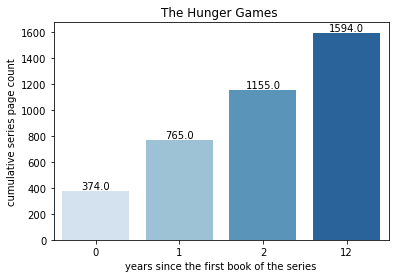

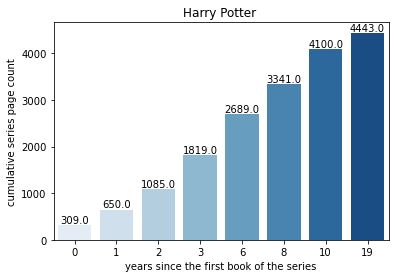

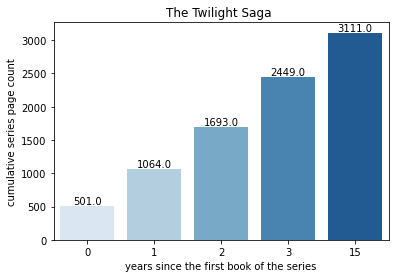

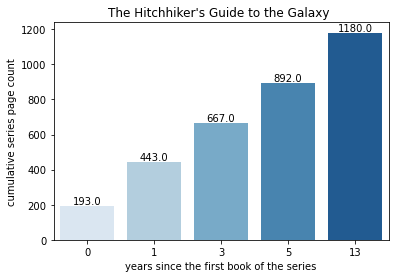

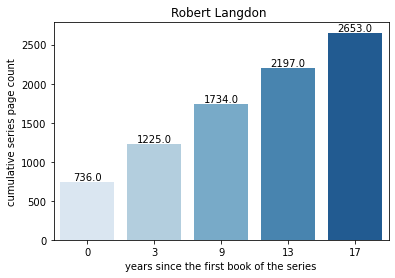

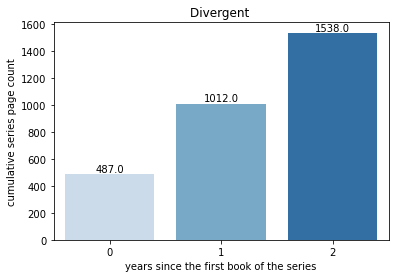

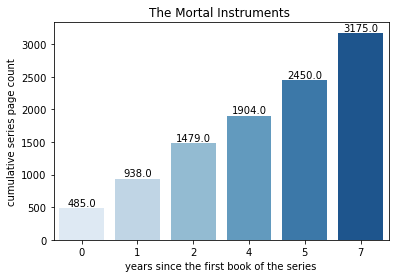

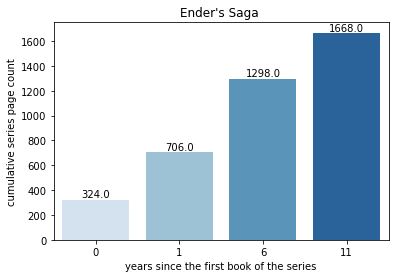

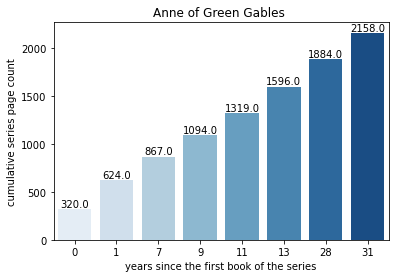

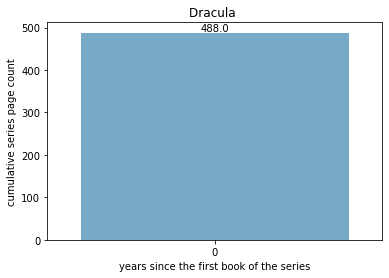

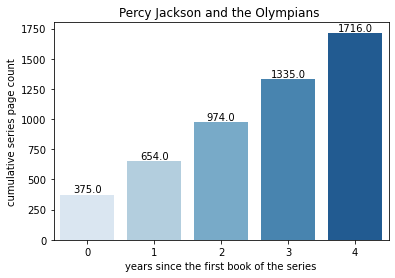

In [50]:
fn.plot_series(series_to_analyze,df1)